<a href="https://colab.research.google.com/github/shobhakhar/Stroke-Events-Data-Preparation-and-Preliminary-Analysis/blob/main/603_Final_Project_colab_sqlite3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Connect GoogleColab to the Python environment.
import pandas as pd
import numpy as np
from functools import reduce
import sqlite3

In [ ]:
#Read in Both of the files (stroke_data.csv)
from google.colab import files
#Upload the stroke data
uploaded = files.upload()

Saving stroke_data.csv to stroke_data (2).csv


In [ ]:
#Bring the stroke dataset into the Python Environment
df = pd.read_csv("stroke_data.csv")

In [ ]:
#Check the name of the column
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.info() # Information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head() # Glimpse of dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
df.describe().T # Description of Numerica columns in Dataframe.

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.215264,22.633866,0.00,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.918410,7.731841,10.30,23.700,28.300,32.90,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df.nunique() # count of unique values in dataframe

id                   5110
gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   527
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
df.describe(include=object).T # Description of categoraical columns in dataframe

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [ ]:
df.duplicated().value_counts() # check and count duplicated rows in dataframe

False    5110
dtype: int64

In [ ]:
# Function for determining the number and percentages of missing values in each columns of a dataframe.

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [ ]:
missing(df) # check missing values in dataframe.

,Missing_Number,Missing_Percent
stroke,0,0.0
smoking_status,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
Residence_type,0,0.0
work_type,0,0.0
ever_married,0,0.0
heart_disease,0,0.0
hypertension,0,0.0
age,0,0.0


BMI column has approximately 4% of missing values 

In [ ]:
df["bmi"] = df['bmi'].fillna(df['bmi'].median()) # replace missing values by median by keeping in mind of outliers

In [ ]:
missing(df)

,Missing_Number,Missing_Percent
stroke,0,0.0
smoking_status,0,0.0
bmi,0,0.0
avg_glucose_level,0,0.0
Residence_type,0,0.0
work_type,0,0.0
ever_married,0,0.0
heart_disease,0,0.0
hypertension,0,0.0
age,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


**Reading in dataset from the SQL Database**

In [ ]:
con=sqlite3.connect('stroke_data.db')
print(con)

In [ ]:
con.execute ("DROP TABLE IF EXISTS Stroke_Data1.db")
print("Table dropped")

Table dropped


In [ ]:
try:
  con.execute('''
  CREATE TABLE Stroke_Data1(
  ID                                  INTEGER  PRIMARY KEY,
  GENDER                              TEXT,
  AGE                                 FLOAT,
  HYPERTENSION                        INTEGER,
  HEART_DISEASE                       INTEGER,
  EVER_MARRIED                        TEXT,
  WORK_TYPE                           TEXT,
  RESIDENCE_TYPE                      TEXT,
  AVG_GLUCOSE_LEVEL                    FLOAT,
  BMI                                  FLOAT,
  SMOKING_STATUS                       TEXT,
  STROKE                               INTEGER
  );''')
  print("stroke_data1 Table created successfully")

except Exception as e:
      print(str(e))
      print('stroke_data1 Table creation failed')
finally:
    con.close()


stroke_data Table created successfully


In [ ]:
#create as a list for stroke_data.db
df_list = df.values.tolist()


In [ ]:
#Insert data into stroke_data.db 
con = sqlite3.connect("Stroke_Data1.db")
cursor = con.cursor()

try:
  cursor.executemany('''
        INSERT INTO Stroke_Data1 (ID,GENDER,AGE,HYPERTENSION,HEART_DISEASE,EVER_MARRIED,WORK_TYPE,
        RESIDENCE_TYPE,AVG_GLUCOSE_LEVEL,BMI,SMOKING_STATUS,STROKE)
        VALUES (?,?,?,?,?,?,?,?,?,?,?,?)''', df_list)
  con.commit()
  print("Data Insterted successfully")
except Exception as e:
  print(str(e))
  print("Insertion failed!")
finally:
  con.close()

no such table: Stroke_Data1
Insertion failed!


In [ ]:
con = sqlite3.connect("stroke_data.db")
cur=con.cursor()
rows = ("SELECT count(*) as Total_Observations FROM stroke_data")
total_rows = pd.read_sql_query(rows, con)
con.close()
total_rows

,Total_Observations
0,5110


In [ ]:
#See the stroke data
con=sqlite3.connect("stroke_data.db")
select_data = 'SELECT * FROM stroke_data'
progress=pd.read_sql_query(select_data, con)
con.close()
progress 

,ID,GENDER,AGE,HYPERTENSION,HEART_DISEASE,EVER_MARRIED,WORK_TYPE,RESIDENCE_TYPE,AVG_GLUCOSE_LEVEL,BMI,SMOKING_STATUS,STROKE
0,67,Female,17.0,0,0,No,Private,Urban,92.97,28.5,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
5106,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
5107,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
5108,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


In [ ]:
conn=sqlite3.connect("stroke_data.db")
cursor = conn.execute("SELECT AGE,BMI,STROKE FROM stroke_data ORDER BY AGE LIMIT 25")
for row in cursor:
  print(row)

(0.0, 33.1, 0)
(0.0, 18.9, 0)
(0.0, 20.1, 0)
(0.0, 21.1, 0)
(0.0, 24.9, 0)
(0.0, 13.9, 0)
(0.0, 14.2, 0)
(0.0, 17.8, 0)
(0.0, 20.1, 0)
(0.0, 17.4, 0)
(0.0, 14.1, 0)
(0.0, 22.4, 0)
(0.0, 15.5, 0)
(0.0, 17.4, 0)
(0.0, 15.1, 0)
(0.0, 14.8, 0)
(0.0, 16.4, 0)
(0.0, 16.9, 0)
(0.0, 17.5, 0)
(0.0, 16.2, 0)
(0.0, 19.6, 0)
(0.0, 14.3, 0)
(0.0, 17.4, 0)
(0.0, 14.3, 0)
(0.0, 13.0, 0)


In [ ]:
con=sqlite3.connect("stroke_data.db")
select_data = 'SELECT ID, GENDER, AGE FROM stroke_data WHERE AGE > 30 ORDER BY AGE DESC'
progress=pd.read_sql_query(select_data, con)
con.close()
progress 

,ID,GENDER,AGE
0,712,Female,82.0
1,1460,Female,82.0
2,4591,Female,82.0
3,4753,Male,82.0
4,5387,Female,82.0
...,...,...,...
3535,67548,Female,31.0
3536,69120,Female,31.0
3537,69482,Female,31.0
3538,69528,Female,31.0


In [ ]:
con=sqlite3.connect("stroke_data.db")
select_data = 'SELECT count(GENDER) AS count FROM stroke_data GROUP BY GENDER'
progress=pd.read_sql_query(select_data, con)
con.close()
progress 

,count
0,2994
1,2115
2,1


 ### Explore Numerical Features
 

In [ ]:
numeric_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]

In [ ]:
numeric_cols

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [ ]:
# drop 'id' column
df.drop('id', axis=1, inplace=True)

In [ ]:
# column heart_disease is not numeric eventhough its values are in the form of 0 or 1.
# column stroke is target and has binary values in the form of 0 or 1.
# similarly, columns heart_disease and hypertension are also not numeric and in the form of binary integer values.
df["stroke"].unique()

array([1, 0])

In [ ]:
df["heart_disease"].unique()

array([1, 0])

In [ ]:
df["hypertension"].unique()

array([0, 1])

### Only numeric columns are: Age, avg_glucose_level and bmi.

In [ ]:
df["age"]

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int64

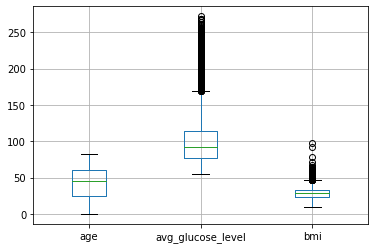

In [ ]:
boxplot = df.boxplot(column=['age','avg_glucose_level','bmi'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10837e4a50>,
      dtype=object)

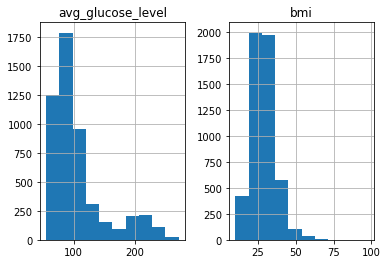

In [ ]:
df.hist(column=['avg_glucose_level','bmi'])

In [ ]:
# Check the skewness
df["bmi"].skew(),df["avg_glucose_level"].skew()

(1.04742257992273, 1.5722838665030459)

From boxplot, we can see that the age column values are approximately normal where as avg_glucose_level and bmi values are slightly right skewed with outliers on right side of wishkers.

## **Data Transformation**

We will apply log transformation on bmi and avg_glucose_level to see if it helps to keep their values approximately normal.

In [ ]:
df["log_bmi"] = np.log(df["bmi"])
df["log_avg_glucose_level"] = np.log(df["avg_glucose_level"])

NameError: ignored

In [ ]:
boxplot1 = df.boxplot(column=['log_avg_glucose_level','log_bmi'])

NameError: ignored

In [ ]:
df.hist(column=['log_avg_glucose_level','log_bmi'])

NameError: ignored

In [ ]:
# Check the skewness
df["log_bmi"].skew(),df["log_avg_glucose_level"].skew()

NameError: ignored

It does seem to help much better in bmi column but still exsits some skewness in avg_glucose_level column.

Lets try MinMaxScaler Transform to see if the distribution of data looks better(close to normal)

In [ ]:
# MinMaxScaler Transformation
from sklearn.preprocessing import MinMaxScaler

In [ ]:
MMS = MinMaxScaler()

In [ ]:
df[['mms_bmi','mms_agl']] = MMS.fit_transform(df[['bmi','avg_glucose_level']])

In [ ]:
df["mms_bmi"].max(), df["mms_bmi"].min()

In [ ]:
df["mms_agl"].min(), df["mms_agl"].max()

In [ ]:
boxplot2 = df.boxplot(column=['mms_bmi','mms_agl'])

In [ ]:
df.hist(column =['mms_bmi','mms_agl'])

In [ ]:
# Check the skewness
df["mms_bmi"].skew(),df["mms_agl"].skew()

## Distributions looks similar to original scale (not even better than log transformation)

Lets try StandardScaler Transform to see if the distribution of data looks better(close to normal)

In [ ]:
# StandardScaler Transformation
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()

In [ ]:
df[['ss_bmi','ss_agl']] = SS.fit_transform(df[['bmi','avg_glucose_level']])

In [ ]:
df["ss_bmi"].max(), df["ss_bmi"].min()

(8.883823167977287, -2.4082533022077777)

In [ ]:
df["ss_agl"].min(), df["ss_agl"].max()

(-1.1269580083887039, 3.657144612645025)

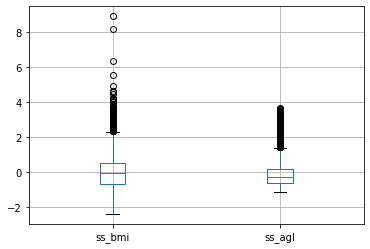

In [ ]:
boxplot3 = df.boxplot(column=['ss_bmi','ss_agl'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1083185750>,
      dtype=object)

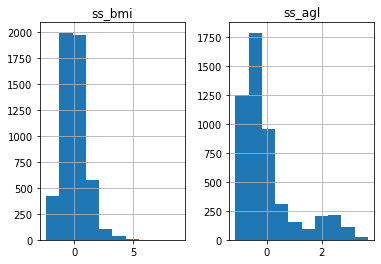

In [ ]:
df.hist(column=['ss_bmi','ss_agl'])

In [ ]:
# Check the skewness
df["ss_bmi"].skew(),df["ss_agl"].skew()

(1.0474225799227295, 1.5722838665030459)

Skewness results still same as in original scale.

Let's try Power Transformer

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
PT = PowerTransformer(method ='yeo-johnson')

In [ ]:
df[['PT_bmi','PT_agl']] = PT.fit_transform(df[['bmi','avg_glucose_level']])

In [ ]:
df["PT_agl"].min(), df["PT_agl"].max()

(-2.2245302479108253, 2.056360145630407)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f108308cad0>,
      dtype=object)

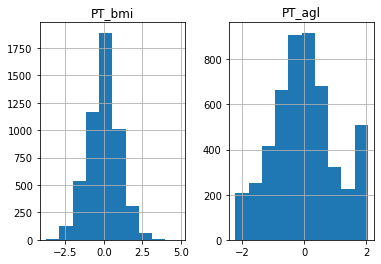

In [ ]:
df.hist(column=['PT_bmi','PT_agl'])

In [ ]:
df['PT_bmi'].skew(), df["PT_agl"].skew()

(-6.512478748480447e-05, 0.08457359015957147)

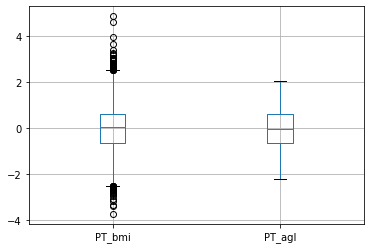

In [ ]:
boxplot4 = df.boxplot(column=['PT_bmi','PT_agl'])

## Power transformation is the best transformation among all the transformations that we have used.
Here, we have the smallest skewness value among all transformations.

## Handling Imbalance Data
Having imbalance dataset decreases the sensitivity of the model towards minority classes.
Here, we will upsample the minority class.

In [ ]:
import seaborn as sns

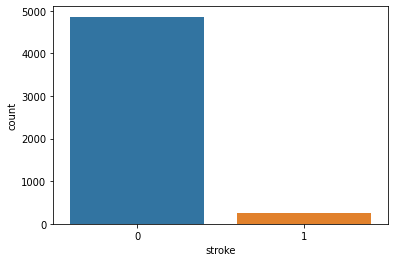

In [ ]:
sns.countplot(x='stroke',data =df)

In [ ]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Clearly, one can see that we have close to Imbalanced data.

In [ ]:
# Upsampling minority class


In [ ]:
from sklearn.utils import resample

In [ ]:
# create two different dataframe of majority and minority class
df_majority = df[(df['stroke']==0)]
df_minority = df[(df["stroke"]==1)]

In [ ]:
df_majority.shape

(4861, 19)

In [ ]:
df_minority.shape

(249, 19)

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority,  
                                 replace = True,            # sample with replacement
                                 n_samples = 4861,          # To match majority class
                                 random_state = 23)         # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled.shape

(9722, 19)

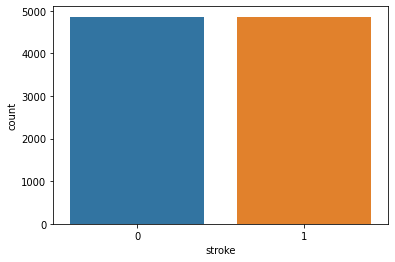

In [ ]:
sns.countplot(x='stroke',data =df_upsampled)

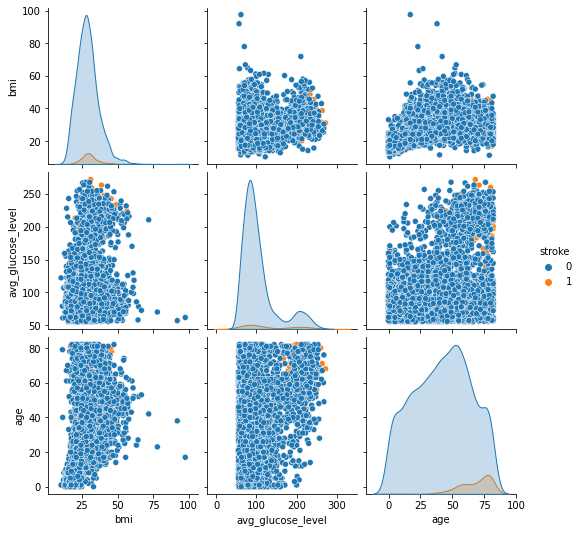

In [ ]:
df1 = df[["bmi",'avg_glucose_level','stroke','age']]
sns.pairplot(df1, hue="stroke")

In [ ]:
# reindexing 
df3 = df_upsampled.reset_index()

In [ ]:
df3.head()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,log_bmi,log_avg_glucose_level,mms_bmi,mms_agl,ss_bmi,ss_agl,PT_bmi,PT_agl
0,83,Female,68,1,0,No,Self-employed,Urban,79.79,29.7,never smoked,1,3.391147,4.379398,0.222222,0.113886,0.101097,-0.582115,0.228913,-0.526270
1,230,Female,81,0,0,Yes,Self-employed,Rural,81.95,16.9,never smoked,1,2.827314,4.406109,0.075601,0.123857,-1.554557,-0.534411,-1.912049,-0.427239
2,40,Male,78,0,0,Yes,Private,Rural,78.03,23.9,formerly smoked,1,3.173878,4.357093,0.155785,0.105761,-0.649121,-0.620985,-0.601772,-0.611120
3,201,Male,80,1,1,Yes,Private,Urban,175.29,31.5,formerly smoked,1,3.449988,5.166442,0.242841,0.554750,0.333923,1.527024,0.454872,1.483736
4,182,Female,32,0,0,Yes,Private,Rural,76.13,29.9,smokes,1,3.397858,4.332442,0.224513,0.096990,0.126967,-0.662947,0.254666,-0.707236


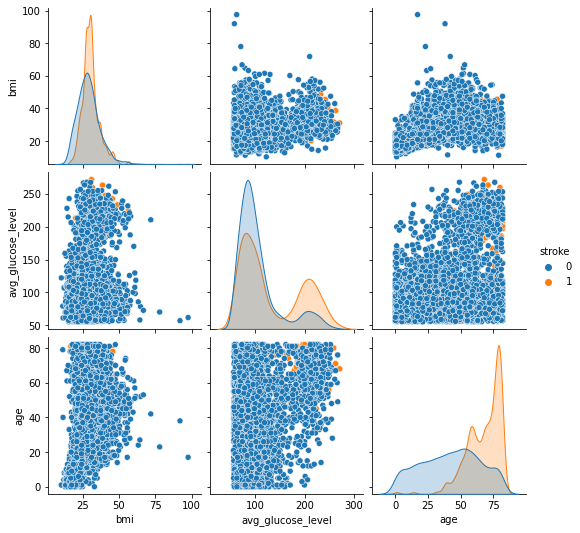

In [ ]:
df2 = df3[["bmi",'avg_glucose_level','stroke','age']]
sns.pairplot(df2, hue="stroke")

In [ ]:
num_vars = ["age","bmi","avg_glucose_level"]

In [ ]:
import matplotlib.pyplot as plt

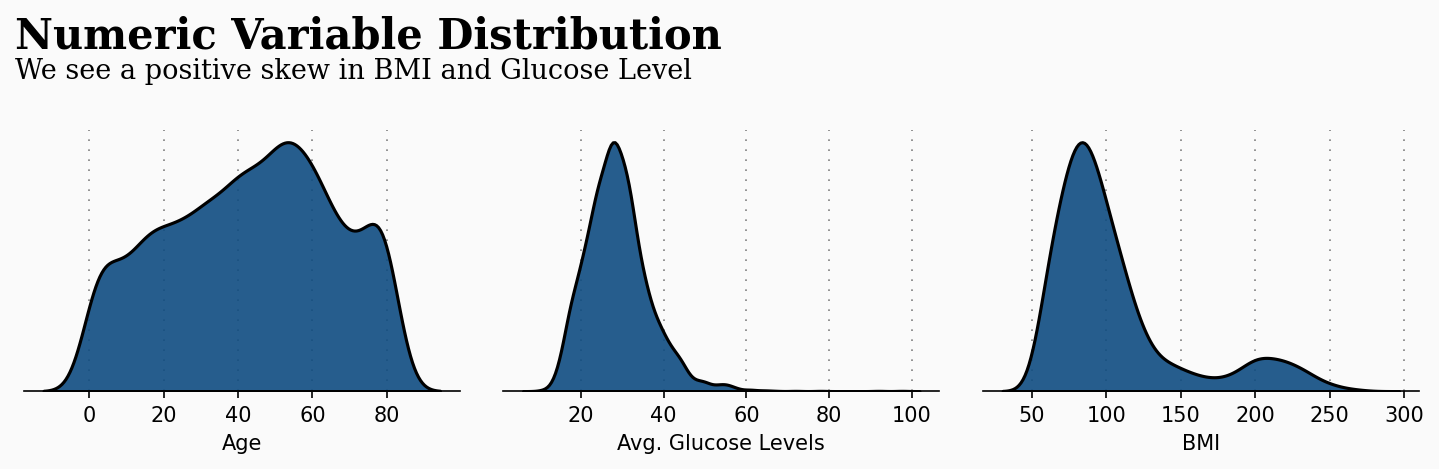

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in num_vars:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

### Let's see the distribution of numeric variables with stroke labels.

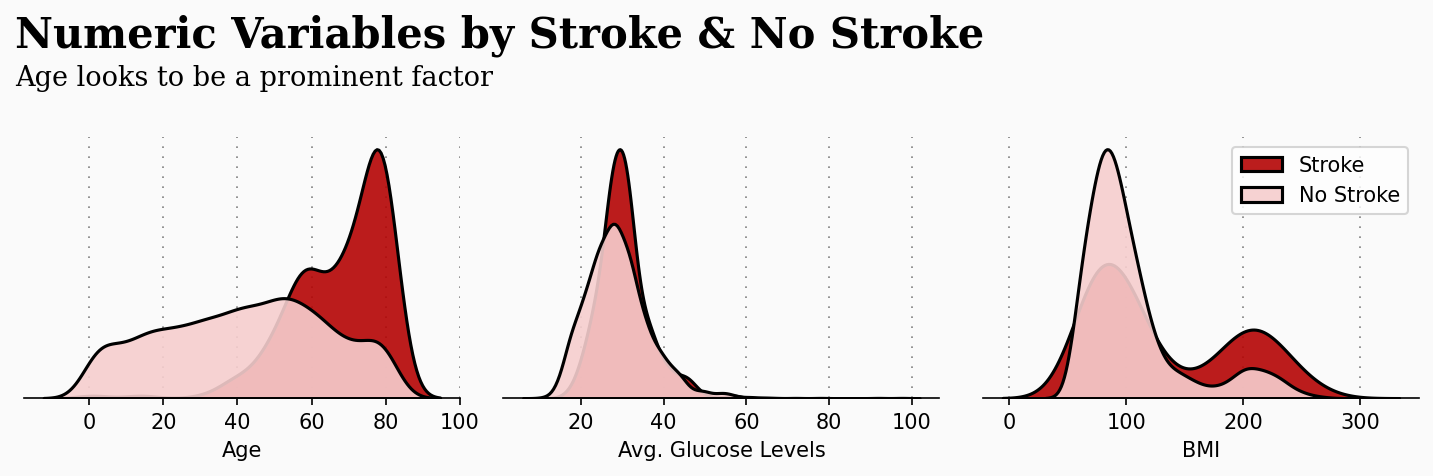

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1


plot = 0
s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in num_vars:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#B40404', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#F6CECE', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor', 
         fontsize=13, fontweight='light', fontfamily='serif')
plt.legend(["Stroke","No Stroke"])
plt.show()

### Based on the above plots, it seems clear that Age is a big factor in stroke patients
### ---the older you get the more you are at risk of stroke.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


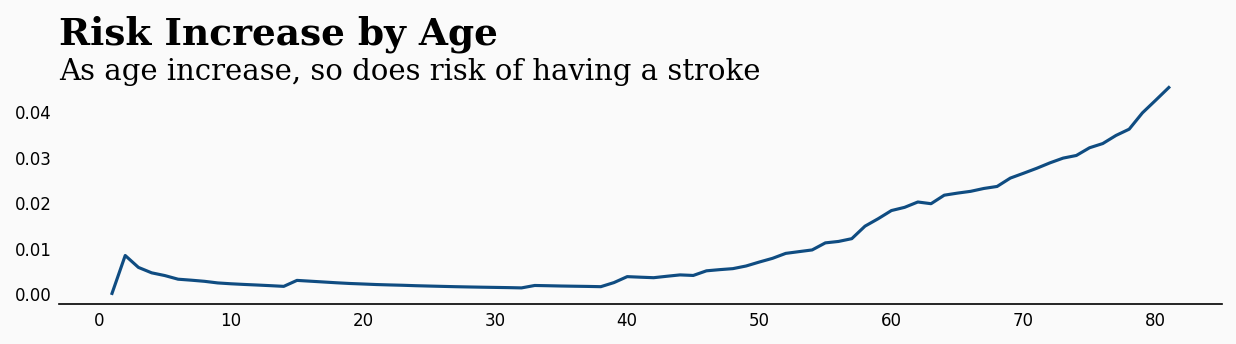

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)


df['age'] = df['age'].astype(int)

rate = []
for i in range(df['age'].min(), df['age'].max()):
    rate.append(df[df['age'] < i]['stroke'].sum() / len(df[df['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

In [ ]:
stroke = df[df['stroke'] == 1]
no_stroke= df[df['stroke'] == 0]

In [ ]:
# Drop single 'Other' gender
no_stroke = no_stroke[(no_stroke['gender'] != 'Other')]

In [ ]:
import matplotlib.ticker as mtick

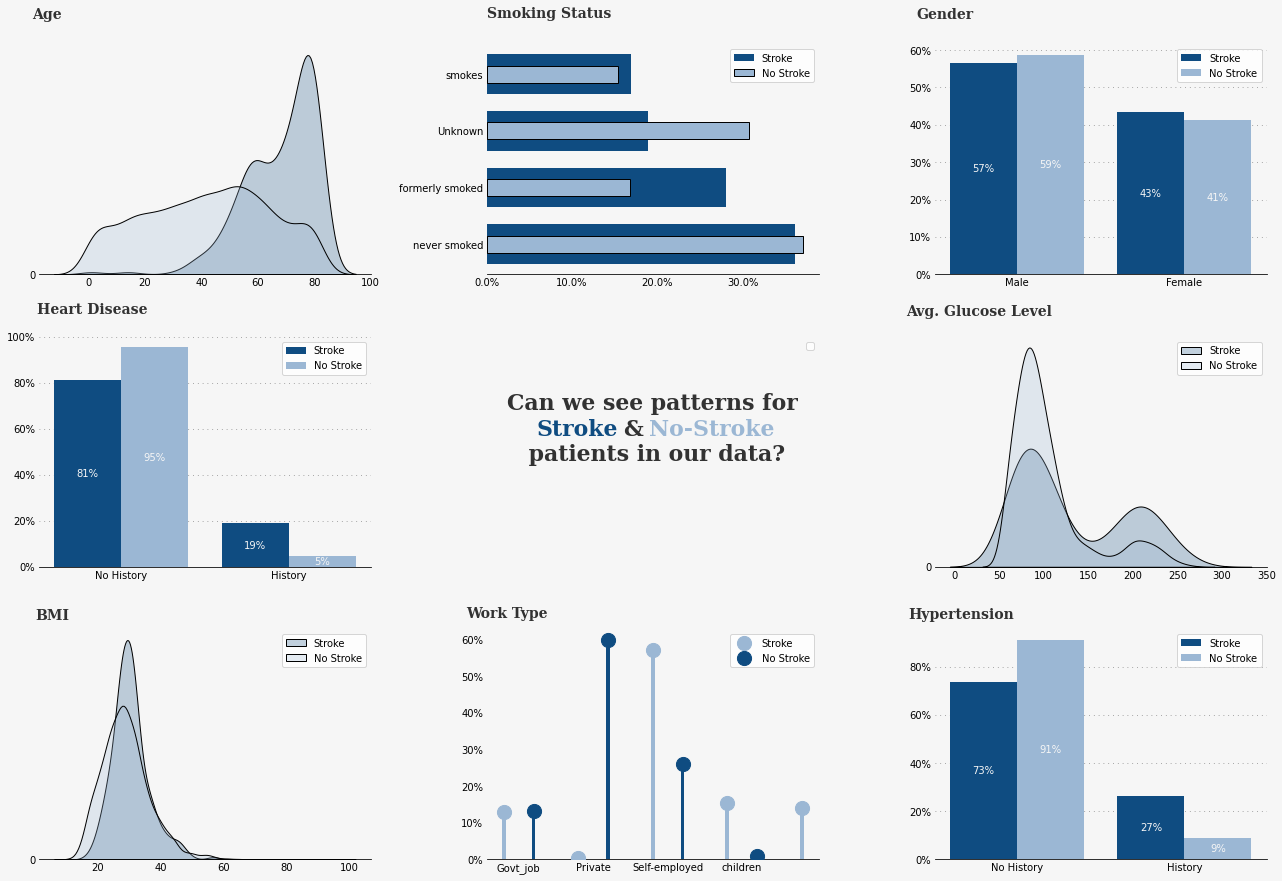

In [ ]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color


# Plots

## Age
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["age"])
negative = pd.DataFrame(no_stroke["age"])
sns.kdeplot(positive["age"], ax=ax0,color="#0f4c81", shade=True, ec='black',label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# Smoking
positive = pd.DataFrame(stroke["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_stroke["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
positive = pd.DataFrame(stroke["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_stroke["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
# Heart Dis

positive = pd.DataFrame(stroke["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_stroke["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')

# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["avg_glucose_level"])
negative = pd.DataFrame(no_stroke["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')

## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["bmi"])
negative = pd.DataFrame(no_stroke["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')

# Work Type

positive = pd.DataFrame(stroke["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_stroke["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")
ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")


# hypertension

positive = pd.DataFrame(stroke["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_stroke["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# tidy up



for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

# show legends
ax8.legend(['Stroke', 'No Stroke'])
ax2.legend(['Stroke','No Stroke'])
ax1.legend(['Stroke','No Stroke'])
ax4.legend(['Stroke','No Stroke'])
ax5.legend(['Stroke','No Stroke'])
ax6.legend(['Stroke','No Stroke'])
ax7.legend(['Stroke','No Stroke'])
ax3.legend(['Stroke','No Stroke'])

plt.show()

### Stroke Pie-chart

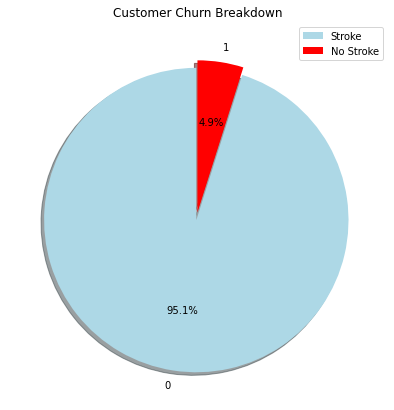

In [ ]:
labels =df['stroke'].value_counts(sort = True).index
sizes = df['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.legend(['Stroke','No Stroke'])
plt.show()

### Stroke/Ever Married

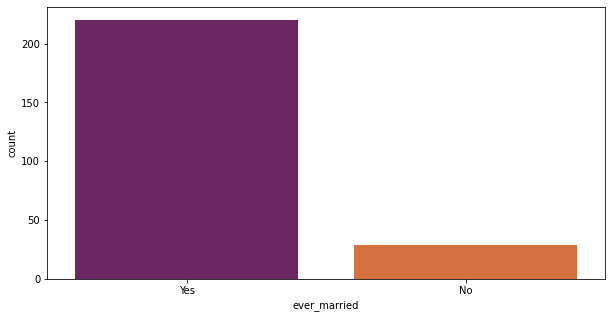

In [ ]:
plt.figure(figsize=(10,5))
strok=df.loc[df['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno')

### Stroke/Work Type

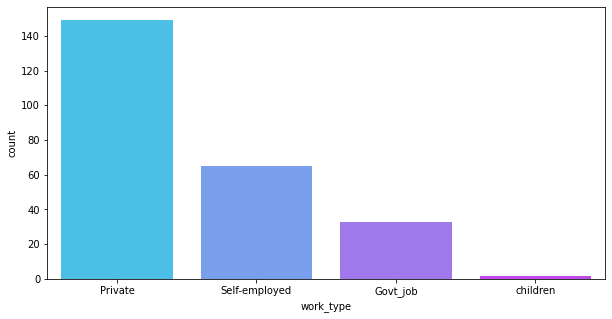

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool')

### Stroke/Smoking Status

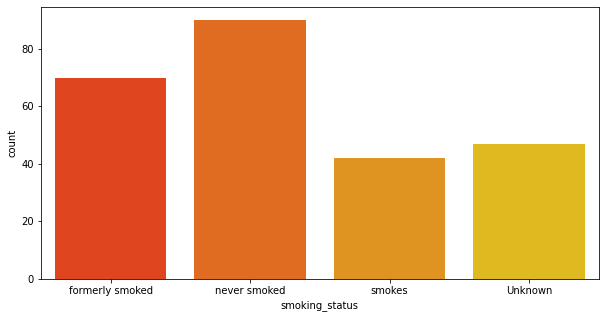

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn')

### Being a smoker or a formerly smoker increases your risk of having a stroke

### Stroke/Residence Type

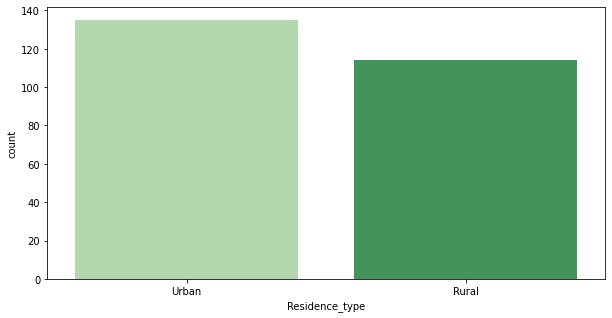

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Greens')

### Stroke/Heart Disease

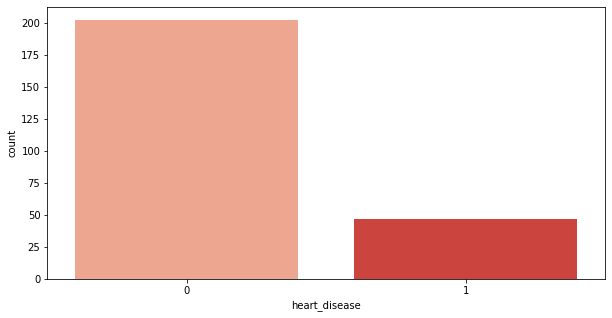

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds')

### Most people who have had a stroke do not have any heart disease, but that does not prevent it being an influential factor

### Stroke/Hypertension

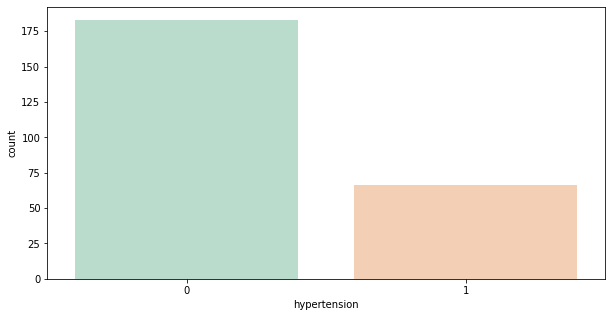

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2')

More than 25% of stroke cases, They had hypertension.

**Now, Lets do similar Analysis and visualizations using upsampled data.**

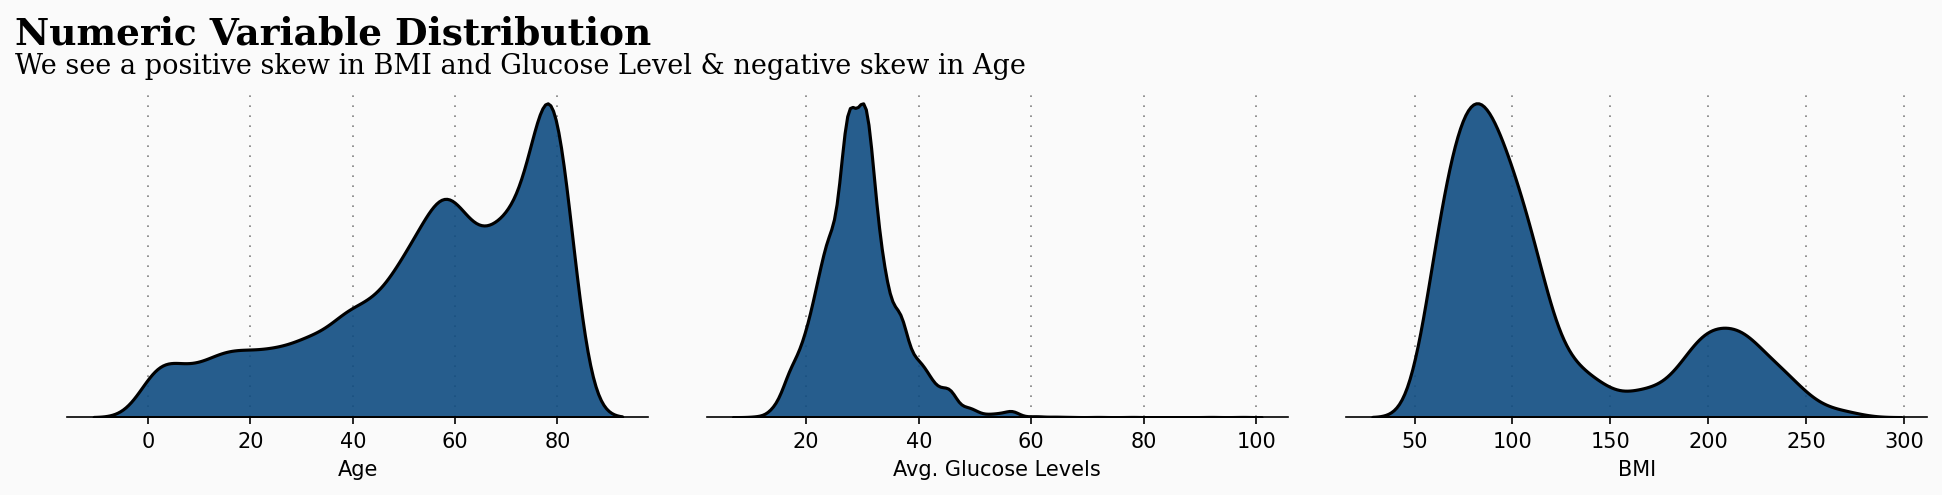

In [ ]:
fig = plt.figure(figsize=(16, 16), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.5)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in num_vars:
        sns.kdeplot(df3[variable] ,ax=locals()["ax"+str(plot)], color='#0f4c81', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(variable) removed this for aesthetics
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-26, 0.031, 'Numeric Variable Distribution', fontsize=18, fontweight='bold', fontfamily='serif')
ax0.text(-26, 0.0285, 'We see a positive skew in BMI and Glucose Level & negative skew in Age', fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

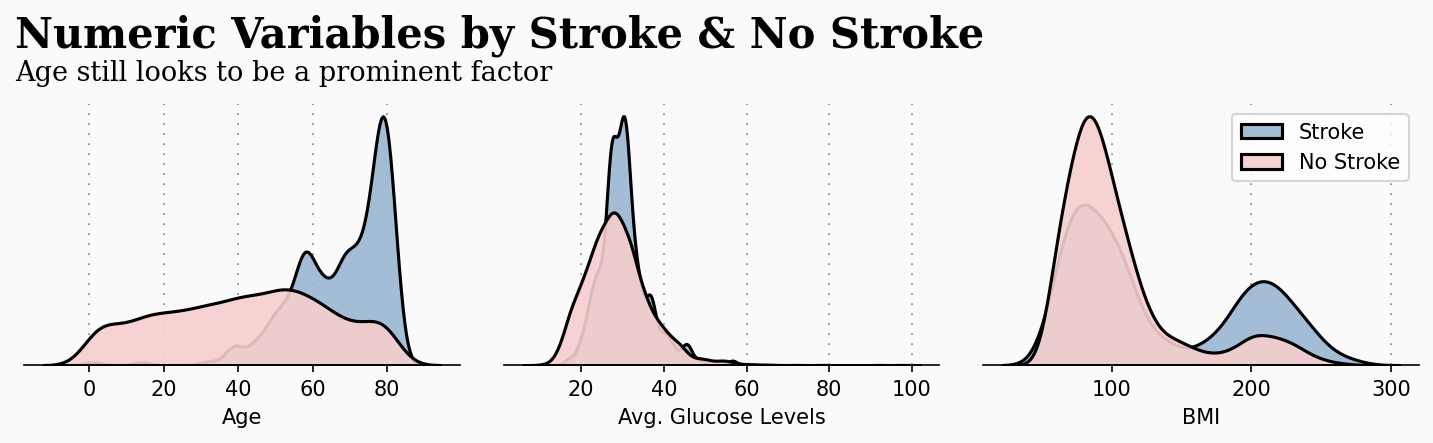

In [ ]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1


plot = 0
s = df3[df3['stroke'] == 1]
ns = df3[df3['stroke'] == 0]

for feature in num_vars:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#9bb7d4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#F6CECE', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        #locals()["ax"+str(plot)].set_xlabel(feature)
        plot += 1
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
        
ax0.text(-20, 0.067, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.06, 'Age still looks to be a prominent factor', 
         fontsize=13, fontweight='light', fontfamily='serif')
ax2.legend(['Stroke','No Stroke'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


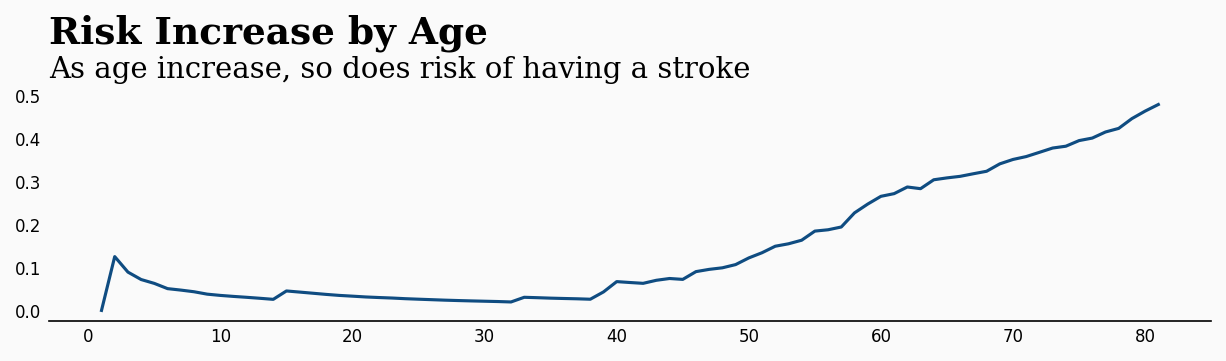

In [ ]:
fig = plt.figure(figsize=(10, 5), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(background_color)


df3['age'] = df3['age'].astype(int)

rate = []
for i in range(df3['age'].min(), df3['age'].max()):
    rate.append(df3[df3['age'] < i]['stroke'].sum() / len(df3[df3['age'] < i]['stroke']))

sns.lineplot(data=rate,color='#0f4c81',ax=ax0)

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax0.text(-3,0.62,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.54,'As age increase, so does risk of having a stroke',fontsize=14,fontfamily='serif')


plt.show()

In [ ]:
stroke = df3[df3['stroke'] == 1]
no_stroke= df3[df3['stroke'] == 0]

In [ ]:
# Drop single 'Other' gender
no_stroke = no_stroke[(no_stroke['gender'] != 'Other')]

In [ ]:
import matplotlib.ticker as mtick

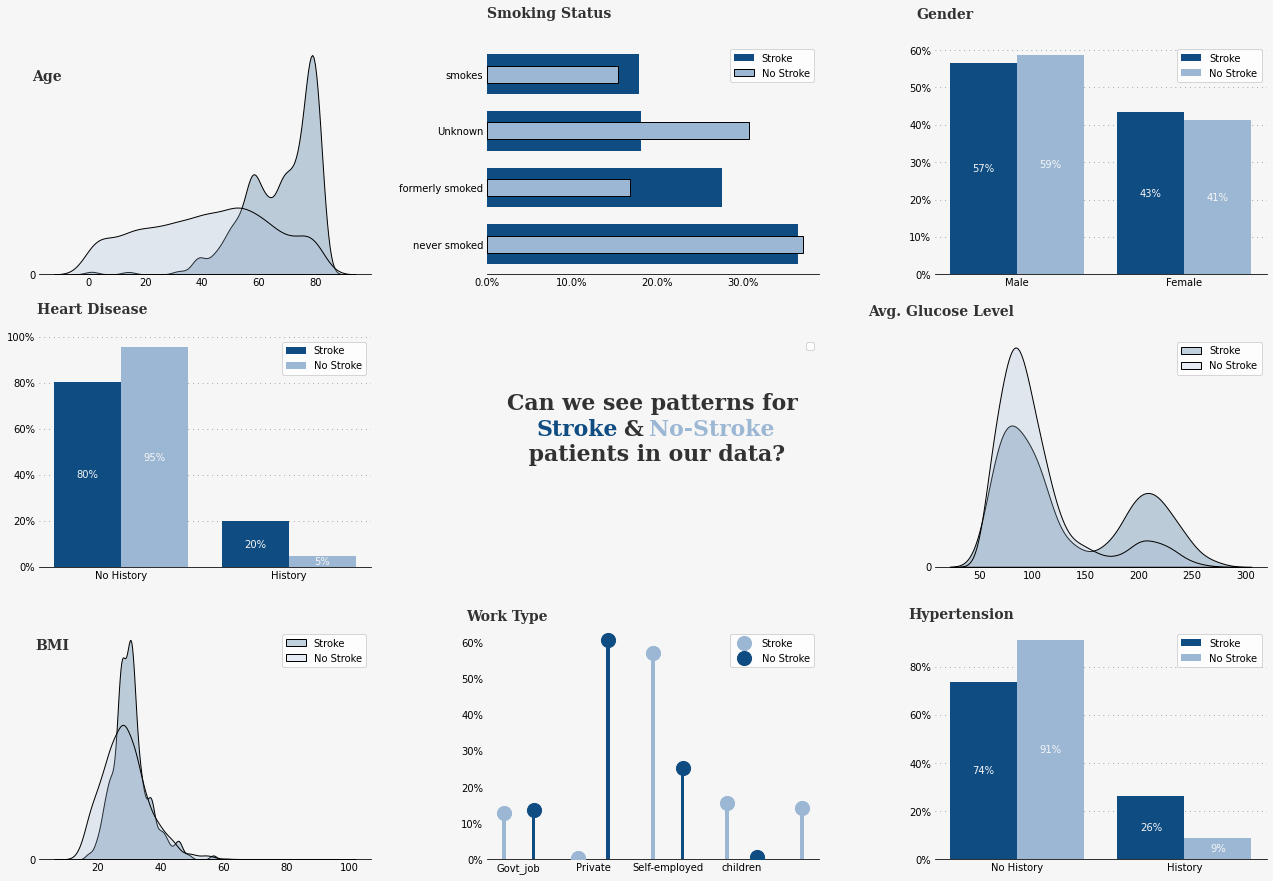

In [ ]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#f6f6f6"
fig.patch.set_facecolor(background_color) # figure background color


# Plots

## Age
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["age"])
negative = pd.DataFrame(no_stroke["age"])
sns.kdeplot(positive["age"], ax=ax0,color="#0f4c81", shade=True, ec='black',label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="#9bb7d4", shade=True, ec='black',label="negative")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# Smoking
positive = pd.DataFrame(stroke["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_stroke["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(positive.index, positive['Percentage'], color="#0f4c81", zorder=3, height=0.7)
ax1.barh(negative.index, negative['Percentage'], color="#9bb7d4", zorder=3,ec='black', height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
positive = pd.DataFrame(stroke["gender"].value_counts())
positive["Percentage"] = positive["gender"].apply(lambda x: x/sum(positive["gender"])*100)
negative = pd.DataFrame(no_stroke["gender"].value_counts())
negative["Percentage"] = negative["gender"].apply(lambda x: x/sum(negative["gender"])*100)

x = np.arange(len(positive))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax2.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], positive["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
# Heart Dis

positive = pd.DataFrame(stroke["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_stroke["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#0f4c81')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#9bb7d4')

# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["avg_glucose_level"])
negative = pd.DataFrame(no_stroke["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax5,color="#0f4c81",ec='black', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax5, color="#9bb7d4", ec='black',shade=True, label="negative")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')

## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["bmi"])
negative = pd.DataFrame(no_stroke["bmi"])
sns.kdeplot(positive["bmi"], ax=ax6,color="#0f4c81", ec='black',shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax6, color="#9bb7d4",ec='black', shade=True, label="negative")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')

# Work Type

positive = pd.DataFrame(stroke["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_stroke["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax7.bar(negative.index, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.05)
ax7.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="#9bb7d4")
ax7.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.05)
ax7.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="#0f4c81")
ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax7.set_xticklabels(list(positive.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")


# hypertension

positive = pd.DataFrame(stroke["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_stroke["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color="#0f4c81", width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#9bb7d4", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

# show legends
ax8.legend(['Stroke', 'No Stroke'])
ax2.legend(['Stroke','No Stroke'])
ax1.legend(['Stroke','No Stroke'])
ax4.legend(['Stroke','No Stroke'])
ax5.legend(['Stroke','No Stroke'])
ax6.legend(['Stroke','No Stroke'])
ax7.legend(['Stroke','No Stroke'])
ax3.legend(['Stroke','No Stroke'])

# tidy up



for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,9):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].set_facecolor(background_color) 

       
plt.show()

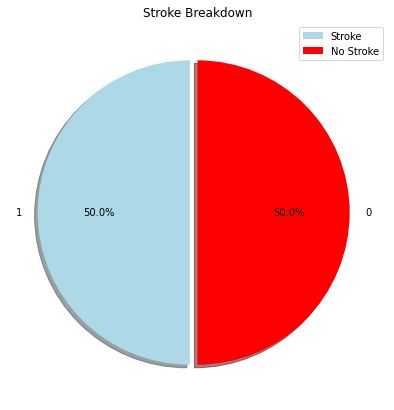

In [ ]:
labels =df3['stroke'].value_counts(sort = True).index
sizes = df3['stroke'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Stroke Breakdown')
plt.legend(['Stroke','No Stroke'])
plt.show()

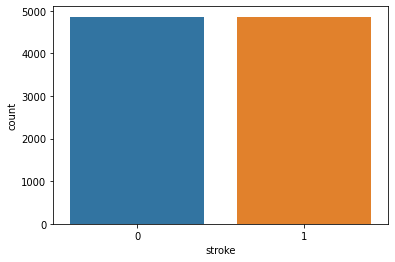

In [ ]:
sns.countplot(x='stroke',data =df3)

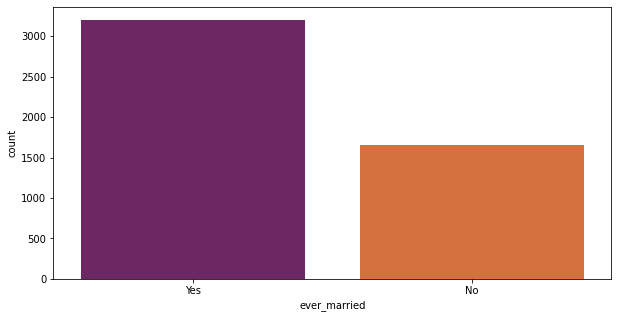

In [ ]:
plt.figure(figsize=(10,5))
strok=df.loc[df3['stroke']==1]
sns.countplot(data=strok,x='ever_married',palette='inferno')


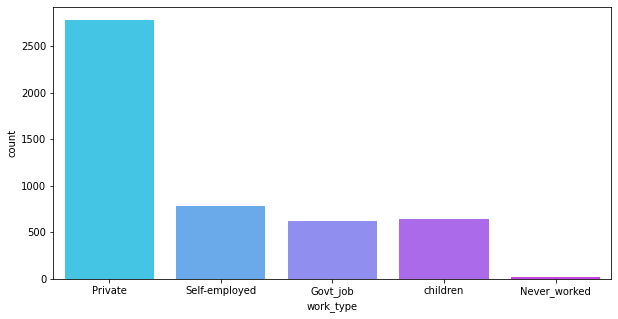

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='work_type',palette='cool')

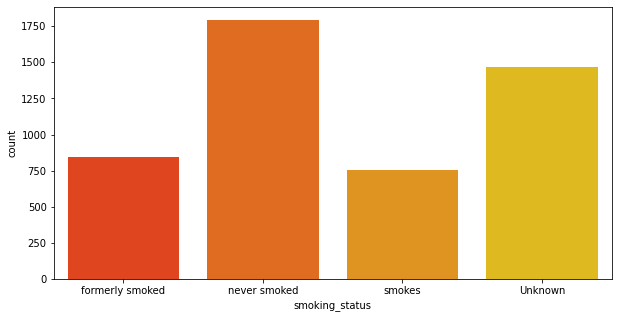

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='autumn')

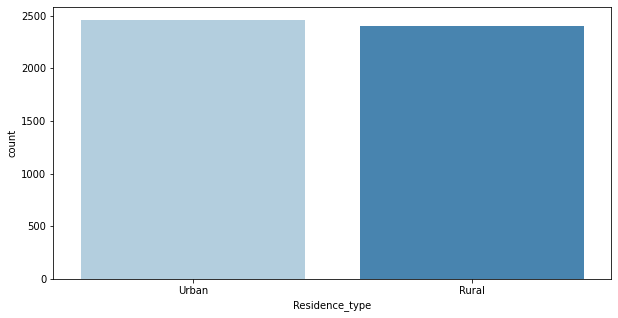

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='Residence_type',palette='Blues')

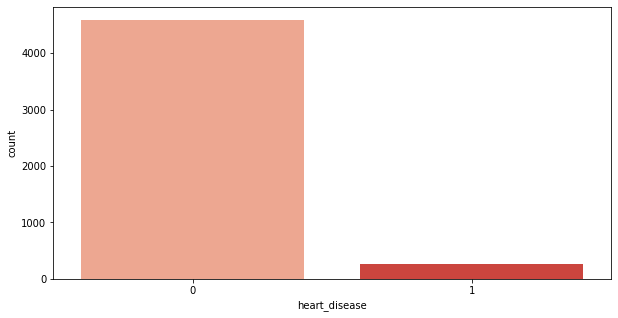

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Reds')

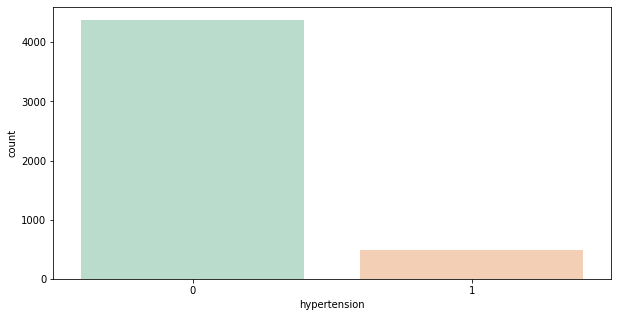

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel2')

**The End!**